<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Split-the-Test-Set-Out-for-Evaluating" data-toc-modified-id="Split-the-Test-Set-Out-for-Evaluating-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Split the Test Set Out for Evaluating</a></span></li><li><span><a href="#Fit-and-Evaluate-the-Model" data-toc-modified-id="Fit-and-Evaluate-the-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fit and Evaluate the Model</a></span></li><li><span><a href="#Evaluate-With-a-Random-Prediction" data-toc-modified-id="Evaluate-With-a-Random-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluate With a Random Prediction</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [3]:
np.random.seed(20180720)

In [4]:
fair_df = sm.datasets.fair.load_pandas().data

# Affair or No – Classification

In [5]:
X = fair_df.iloc[:, :-1]
y = fair_df.affairs > 0

display(
    X.head(),
    y.head(),
    y.groupby(y).count(),
)

X_affairyn = X
y_affairyn = y

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


0    True
1    True
2    True
3    True
4    True
Name: affairs, dtype: bool

affairs
False    4313
True     2053
Name: affairs, dtype: int64

## Split the Test Set Out for Evaluating

In [6]:
X = X_affairyn
y = y_affairyn

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.4
)

print(f'''\
X: {X.shape} → {X_train.shape} ∪ {X_test.shape}
y: {y.shape} → {y_train.shape} ∪ {y_test.shape}''')

X_affairyn_train = X_train
X_affairyn_test = X_test
y_affairyn_train = y_train
y_affairyn_test = y_test

X: (6366, 8) → (3819, 8) ∪ (2547, 8)
y: (6366,) → (3819,) ∪ (2547,)


## Fit and Evaluate the Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

CPU times: user 52.3 ms, sys: 3.74 ms, total: 56.1 ms
Wall time: 59.4 ms

             precision    recall  f1-score   support

      False       0.73      0.82      0.77      1711
       True       0.50      0.38      0.43       836

avg / total       0.65      0.67      0.66      2547



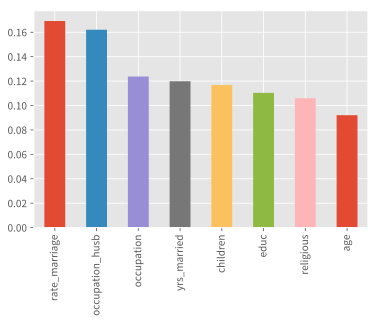

In [7]:
X_train = X_affairyn_train
y_train = y_affairyn_train
X_test = X_affairyn_test
y_test = y_affairyn_test
column_names = X_affairyn.columns

m = ensemble.RandomForestClassifier()
print(m)
print()

%time m.fit(X_train, y_train)
print()

y_test_predict = m.predict(X_test)
print(metrics.classification_report(y_test, y_test_predict))

pd.Series(
    m.feature_importances_,
    index=column_names
).sort_values(ascending=False).plot.bar()

y_affairyn_test_predict = y_test_predict

<img style="float: left;" alt="Manual_decision_tree.jpg" src="https://upload.wikimedia.org/wikipedia/commons/c/c6/Manual_decision_tree.jpg">
<div style="clear: both"></div>

* ↑ decision tree.
* A random forest = $n$ decision trees.
* Output the class that is the *mode* of the classes.
* Output the feature importances.
* Don't need too much preprocessing.

<img style="float: left;" alt="Precisionrecall.svg" src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg">

## Evaluate With a Random Prediction

In [8]:
y_test = y_affairyn_test

y_test_random = np.random.randint(0, 2, size=X_test.shape[0]) == 1
print(metrics.classification_report(y_test, y_test_random))

y_affairyn_test_random = y_test_random

             precision    recall  f1-score   support

      False       0.69      0.48      0.57      1711
       True       0.34      0.55      0.42       836

avg / total       0.58      0.51      0.52      2547



## Visualization

In [9]:
from sklearn.decomposition import PCA

In [10]:
X = X_affairyn_test

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_affairyn_test_pca = X_pca

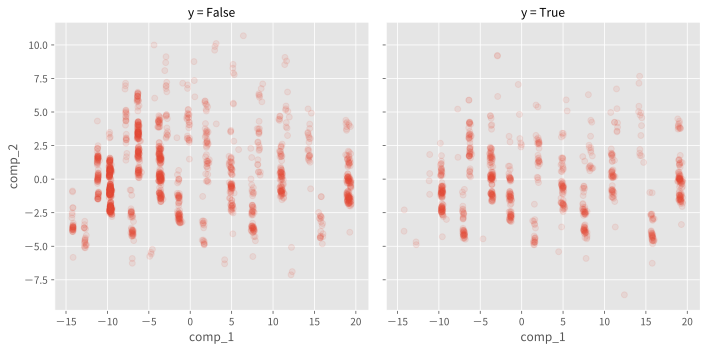

In [11]:
# the truth

X = X_affairyn_test_pca
y = y_affairyn_test

sns.lmplot(
    data=pd.DataFrame(dict(
        comp_1=X[:, 0],
        comp_2=X[:, 1],
        y=y
    )),
    x='comp_1', y='comp_2', col='y',
    fit_reg=False, scatter_kws={'alpha': 0.1}
)

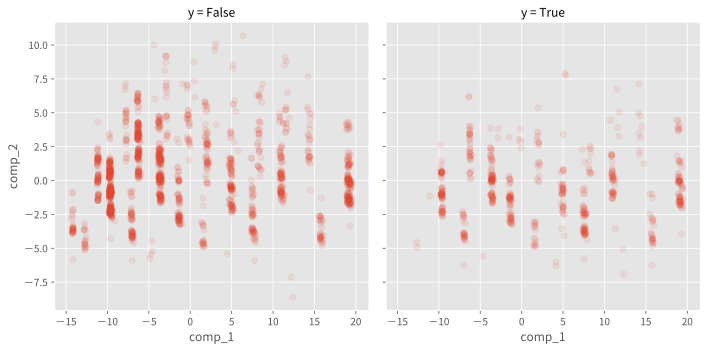

In [12]:
# the prediction
# how are the images of truth and prediction same?

X = X_affairyn_test_pca
y = y_affairyn_test_predict

sns.lmplot(
    data=pd.DataFrame(dict(
        comp_1=X[:, 0],
        comp_2=X[:, 1],
        y=y
    )),
    x='comp_1', y='comp_2', col='y',
    fit_reg=False, scatter_kws={'alpha': 0.1}
)

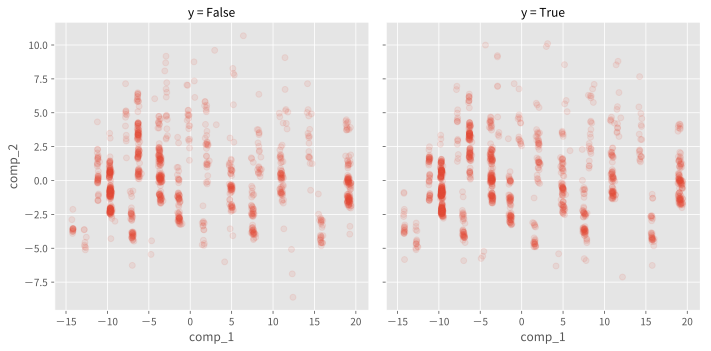

In [13]:
# the random
# how are the images of truth and random same?

X = X_affairyn_test_pca
y = y_affairyn_test_random

sns.lmplot(
    data=pd.DataFrame(dict(
        comp_1=X[:, 0],
        comp_2=X[:, 1],
        y=y
    )),
    x='comp_1', y='comp_2', col='y',
    fit_reg=False, scatter_kws={'alpha': 0.1}
)